In [90]:
#importing libraries and reading the file
import pandas as pd
import numpy as np
import scipy as sc
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
import matplotlib.pyplot as pt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
df = pd.read_csv(r'C:\Users\ragin\OneDrive\Desktop\Tableau\german.data',sep = ' ',header = None)
df.head(n=5)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [34]:
#assigning appropriate headers to the new variable headers
headers = ["Checking account status","Duration(months)","Credit history","Purpose","Credit amount","Savings account/bonds",
          "Employment since","Installment rate(%)","Personal status and sex","Other debtors / guarantors","Present residence since",
          "Property","Age","Other installment plans","Housing","Number of existing credits at this bank","Job","Dependants","Telephone",
          "Foreign worker","Cost Matrix"]
df.columns = headers
df.head(5)

,Checking account status,Duration(months),Credit history,Purpose,Credit amount,Savings account/bonds,Employment since,Installment rate(%),Personal status and sex,Other debtors / guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job,Dependants,Telephone,Foreign worker,Cost Matrix
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [35]:
#Checking the dataset for basic info and Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Checking account status                    1000 non-null object
Duration(months)                           1000 non-null int64
Credit history                             1000 non-null object
Purpose                                    1000 non-null object
Credit amount                              1000 non-null int64
Savings account/bonds                      1000 non-null object
Employment since                           1000 non-null object
Installment rate(%)                        1000 non-null int64
Personal status and sex                    1000 non-null object
Other debtors / guarantors                 1000 non-null object
Present residence since                    1000 non-null int64
Property                                   1000 non-null object
Age                                        1000 non-null int64
Other installment plans                    1000 non-null object
Hou

In [36]:
df.isnull().sum()

Checking account status                    0
Duration(months)                           0
Credit history                             0
Purpose                                    0
Credit amount                              0
Savings account/bonds                      0
Employment since                           0
Installment rate(%)                        0
Personal status and sex                    0
Other debtors / guarantors                 0
Present residence since                    0
Property                                   0
Age                                        0
Other installment plans                    0
Housing                                    0
Number of existing credits at this bank    0
Job                                        0
Dependants                                 0
Telephone                                  0
Foreign worker                             0
Cost Matrix                                0
dtype: int64

**Plotting Correlation heatmap**

In [40]:
numerical=df[['Duration(months)','Credit amount','Installment rate(%)','Age',
                  'Number of existing credits at this bank','Dependants']]

numerical.head()

,Duration(months),Credit amount,Installment rate(%),Age,Number of existing credits at this bank,Dependants
0,6,1169,4,67,2,1
1,48,5951,2,22,1,1
2,12,2096,2,49,1,2
3,42,7882,2,45,1,2
4,24,4870,3,53,2,2


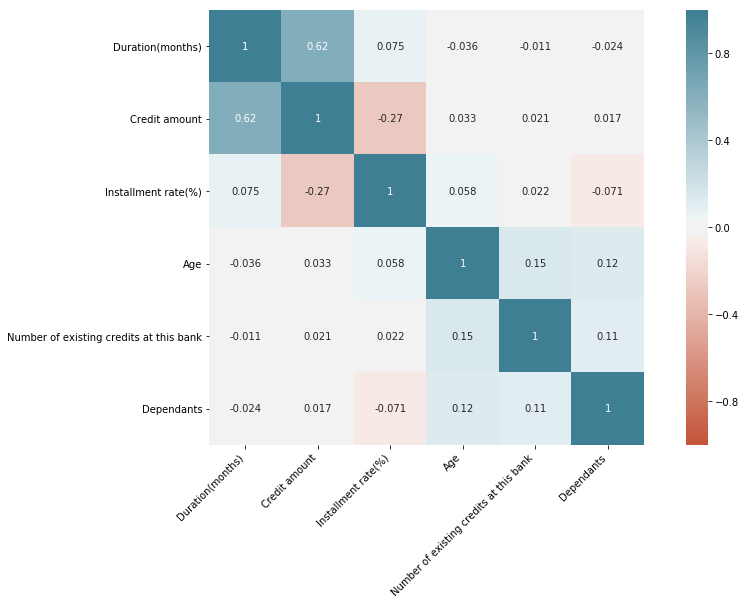

In [41]:
#plotting the correlation heatmap
f, ax = pt.subplots(figsize=(15, 8))
corr=numerical.corr(method = 'pearson')

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
    
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

**From the heat map we can see Credit amount and Duration of credit (months) and Age have best correlation with each other so I will choose them for further analysis.**

**Outlier Analysis**

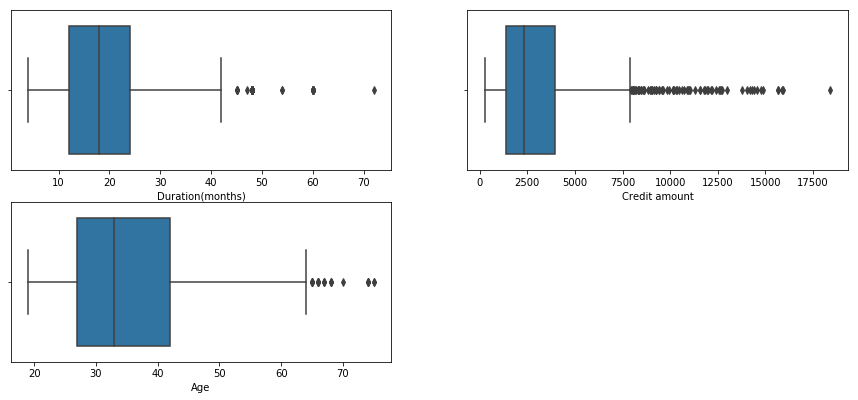

In [44]:
#creating the final dataframe
final_df = numerical[['Duration(months)','Credit amount','Age']]

#boxplots for outlier analysis                             
fig = pt.figure(figsize = (15,10))
axes = 320
for num in final_df:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = final_df, x = num)
pt.show()

From above figures we can see that there are some outliers

**Scaling of dataset**

In [45]:
final_df_scaled = final_df.apply(lambda x: (x - np.mean(x)) / np.std(x))
final_df_scaled.head()

,Duration(months),Credit amount,Age
0,-1.236478,-0.745131,2.766456
1,2.248194,0.949817,-1.191404
2,-0.738668,-0.416562,1.183312
3,1.750384,1.634247,0.831502
4,0.256953,0.566664,1.535122


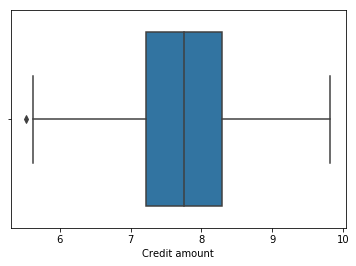

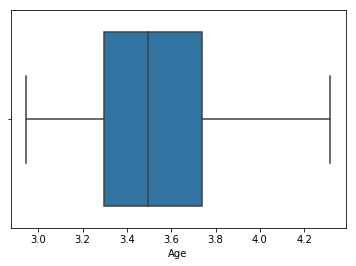

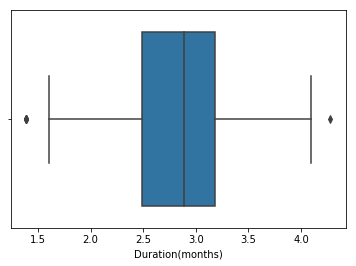

In [62]:
# Scaling the data using the natural logarithm (to remove the outliers)
sns.boxplot(x = df['Credit amount'].apply(np.log))
pt.show()

sns.boxplot(x = df['Age'].apply(np.log))
pt.show()

sns.boxplot(x = df['Duration(months)'].apply(np.log))
pt.show()

**Implementing K-Means Clustering**

In [46]:
#importing the Kmeans module
from sklearn.cluster import KMeans

kms = KMeans(n_clusters=5,n_init=40)

In [47]:
kms.fit(final_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=40, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [48]:
#finding the minimum sum of squares distances
kms.inertia_

943.4347522052975

In [49]:
#Calculating the SSE for different clusters
inertias = []
for k in [2,3,4,5,6,7]:
    kms = KMeans(n_clusters=k,n_init=40)
    inertia = kms.fit(final_df_scaled).inertia_
    inertias.append(inertia)

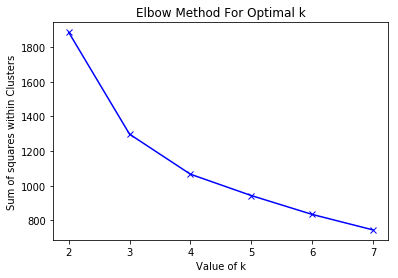

In [50]:
#Plotting the scree plot
pt.plot([2,3,4,5,6,7], inertias, 'bx-')
pt.xlabel('Value of k')
pt.ylabel('Sum of squares within Clusters')
pt.title('Elbow Method For Optimal k')
pt.show()

From the plot we can infer that the optimum value of clusters is 3 as beyond that point rate of decrease of SSE is very low. 

In [51]:
#fitting the KMeans model on the dataframe with 3 clusters
model = KMeans(n_clusters=3)
model.fit(final_df_scaled)
#labels for the cluster
kmeans_labels = model.labels_

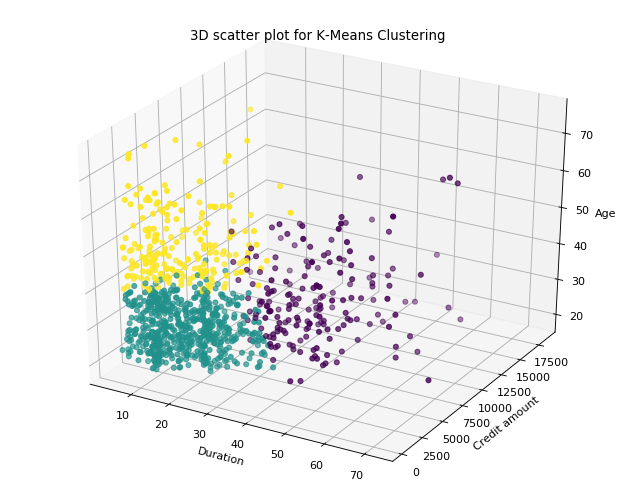

In [52]:
#importing library of 3D plot
from mpl_toolkits.mplot3d import Axes3D

fig = pt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
ax = pt.axes(projection="3d")

#scatter plot of the three features to show the cluster
ax.scatter3D(final_df['Duration(months)'],final_df['Credit amount'], final_df['Age'],
             c=kmeans_labels, cmap='viridis')

#setting the label    
xLabel = ax.set_xlabel('Duration', linespacing=3.2)
yLabel = ax.set_ylabel('Credit amount', linespacing=3.1)
zLabel = ax.set_zlabel('Age', linespacing=3.4)
title = ax.set_title('3D scatter plot for K-Means Clustering')

In [55]:
#finding the centroid of the clusters
final_df['Groups'] = model.labels_
final_df.groupby(['Groups']).mean().round(1)

C:\Users\ragin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Duration(months),Credit amount,Age
Groups,,,
0,39.28,7609.63,34.76
1,16.92,2207.46,29.65
2,15.85,2398.47,51.65


From above we can determine that the clusters are:

    Group 0 - Long duration of credit, high credit amount and young  customers           
    Group 1 - Short duration of credit, low credit amount and young  customers 
    Group 2 - Short duration of credit, low credit amount and older customers

<Figure size 432x288 with 0 Axes>

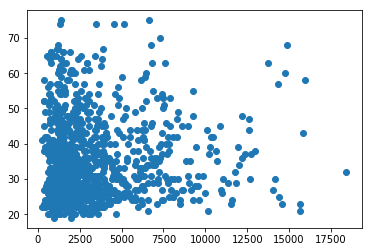

<Figure size 432x288 with 0 Axes>

In [67]:
pt.scatter(df['Credit amount'],df["Age"])
pt.figure()

<Figure size 432x288 with 0 Axes>

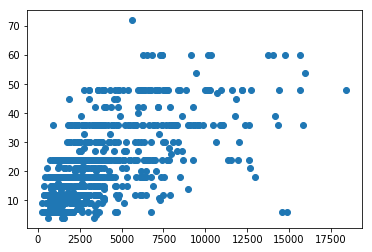

<Figure size 432x288 with 0 Axes>

In [73]:
pt.scatter(df['Credit amount'],df["Duration(months)"])
pt.figure()

In [87]:
df['Savings account/bonds'] = df['Savings account/bonds'].map({"A61":0,"A62":2,"A63":1 ,"A64":3, "A65":4 });
df['Savings account/bonds'] = df['Savings account/bonds'].fillna(df['Savings account/bonds'].dropna().mean())

df['Checking account status'] = df['Checking account status'].map({"A11":0,"A12":1,"A13":2,"A14":3 });
df['Checking account status'] = df['Checking account status'].fillna(df['Checking account status'].dropna().mean())

df['Personal status and sex'] = df['Personal status and sex'].map({"A91":0,"A92":1,"A93":2,"A94":3,"A95":4}).astype(float);

df['Job'] = df['Job'].map({"A171":0,"A172":1,"A173":2,"A174":3}).astype(float);

df['Purpose'] = df['Purpose'].map({'A43':0, 'A46':1, 'A42':2, 'A40':3, 'A49':4,
       'A44':5, 'A45':6, 'A47':7,'A41':8,'A48':9,'A410':10}).astype(float);

Text(0, 40, 'Frequency')

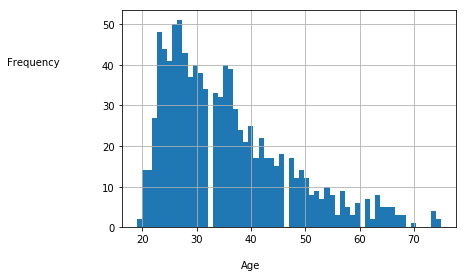

In [84]:
fig = df.Age.hist(bins=60)
fig.text(40, -10, 'Age', ha='center')
fig.text(0, 40, 'Frequency', ha='center')

Text(9, -50, 'A49')

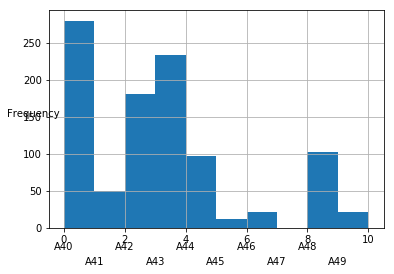

In [86]:
fig = df["Purpose"].hist(bins=10)
fig.text(-1, 150, 'Frequency', ha='center')
fig.text(0, -30, 'A40', ha='center')
fig.text(1, -50, 'A41', ha='center')
fig.text(2, -30, 'A42', ha='center')
fig.text(3, -50, 'A43', ha='center')
fig.text(4, -30, 'A44', ha='center')
fig.text(5, -50, 'A45', ha='center')
fig.text(6, -30, 'A46', ha='center')
fig.text(7, -50, 'A47', ha='center')
fig.text(8, -30, 'A48', ha='center')
fig.text(9, -50, 'A49', ha='center')

Text(3, -100, 'A174')

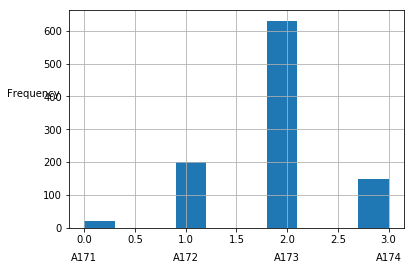

In [89]:
fig = df["Job"].hist()
fig.text(-0.5, 400, 'Frequency', ha='center')
fig.text(0, -100, 'A171', ha='center')
fig.text(1, -100, 'A172', ha='center')
fig.text(2, -100, 'A173', ha='center')
fig.text(3, -100, 'A174', ha='center')

1. People from Age 23 to 32 are the target customer and the amount can be in range 2000 to 5000 (curreny).
2. Offers for car loan and radio loan can pick up more customers.
3. Short term credit with credit range 2000 t0 5000 yield maximum customer and profits.